In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
Filepath1 = '/Users/alexlee/ZJUI 26 Spring/ME330/Lab/Lab0/material/Data/Load-Displacement (Tensile) Data/1045Steel.csv'
Filepath2 = '/Users/alexlee/ZJUI 26 Spring/ME330/Lab/Lab0/material/Data/Load-Displacement (Tensile) Data/7075AL.csv'

In [3]:
Steel_data = pd.read_csv(Filepath1, encoding='utf-8', skiprows=25)
AL_data = pd.read_csv(Filepath2, encoding='utf-8', skiprows=25)

In [4]:
print(Steel_data.head())

    Time Extension   Load   Strain 1
0  (sec)      (mm)    (N)    (mm/mm)
1   0.00      0.00  122.3    0.00004
2   0.00      0.00  122.3    0.00004
3   0.50      0.03  744.7    0.00010
4   1.00      0.07  990.8  0.0001284


In [5]:
Steel_info = {}
with open(Filepath1, 'r') as file:
    for i in range(24):
        line = file.readline().strip()
        if line:
            parts = line.split(',')
            if len(parts) >= 2:
                key = parts[0]
                value = parts[1].strip('"')
                Steel_info[key] = value
Al_info = {}
with open(Filepath2, 'r') as file:
    for i in range(24):
        line = file.readline().strip()
        if line:
            parts = line.split(',')
            if len(parts) >= 2:
                key = parts[0]
                value = parts[1].strip('"')
                Al_info[key] = value

In [6]:
Steel_info

{'Course': 'M',
 'Lab Section Number': '1',
 'Test Group': 'b',
 'Type of Test': 'Tensile - Round',
 'Crosshead Rate': '4.00',
 'Start Date': '2/6/2017 8:40 AM',
 'End Date': '2/6/2017 8:43 AM',
 'Material': '1045',
 'Heat treatment': 'NM',
 'Other information': '',
 'Geometry': 'Circular',
 'Diameter': '7.13',
 'Area': '39.9272',
 'Hardness': '89.1',
 'Rockwell Scale': 'HRB',
 'Grip Diameter (Hardness correction)': '12.63',
 'Gage Length (Extensometer)': '25.40',
 'Maximum Load': '29430',
 'Tensile strain at Maximum Load': '0.1289',
 'Tensile strain at Maximum Strain 1': '0.2893',
 'Load at Maximum Strain 1': '20130',
 'Fracture Type and Location': 'relatively ductile',
 'Final Diameter': '4.51',
 'Notes During Test': ''}

In [7]:
Steel_Time_array = Steel_data['Time'][1:].astype(float)
Steel_Extension = Steel_data['Extension'][1:].astype(float)
Steel_Load = Steel_data['Load'][1:].astype(float)
Steel_Strain = Steel_data['Strain 1'][1:].astype(float)
AL_Time_array = AL_data['Time'][1:].astype(float)
AL_Extension = AL_data['Extension'][1:].astype(float)
AL_Load = AL_data['Load'][1:].astype(float)
AL_Strain = AL_data['Strain 1'][1:].astype(float)

In [8]:
Steel_Stress = Steel_Load / float(Steel_info['Area'])
AL_Stress = AL_Load / float(Al_info['Area'])

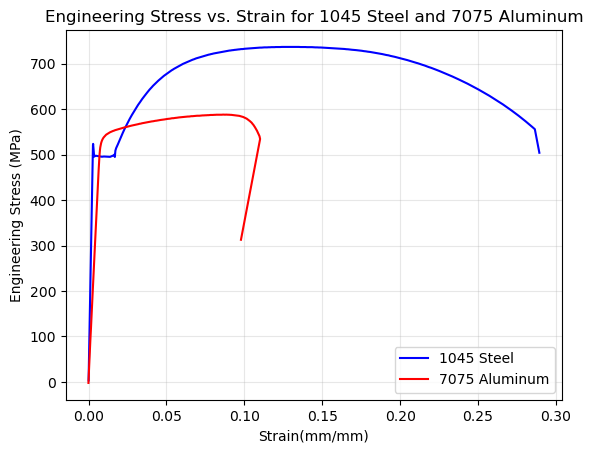

In [9]:
plt.plot(Steel_Strain, Steel_Stress,'b-', linewidth=1.5)
plt.plot(AL_Strain, AL_Stress,'r-', linewidth=1.5)
plt.xlabel('Strain(mm/mm)')
plt.ylabel('Engineering Stress (MPa)')
plt.grid(True, alpha=0.3)
plt.legend(['1045 Steel','7075 Aluminum'])
plt.title('Engineering Stress vs. Strain for 1045 Steel and 7075 Aluminum')
plt.show()

In [10]:
# 最常用方法：取应变 ≤ 0.002 的所有点
elastic_limit = 0.002  # 0.2%
Steel_elastic_mask = Steel_Strain <= elastic_limit
AL_elastic_mask = AL_Strain <= elastic_limit

# 检查数据点数量
Steel_elastic_points = Steel_Strain[Steel_elastic_mask]
AL_elastic_points = AL_Strain[AL_elastic_mask]
print(f"1045 Steel 弹性阶段数据点: {len(Steel_elastic_points)} 个")
print(f"1045 Steel 应变范围: {Steel_elastic_points.min():.6f} 到 {Steel_elastic_points.max():.6f}")
print(f"7075 Aluminum 弹性阶段数据点: {len(AL_elastic_points)} 个")
print(f"7075 Aluminum 应变范围: {AL_elastic_points.min():.6f} 到 {AL_elastic_points.max():.6f}")

1045 Steel 弹性阶段数据点: 60 个
1045 Steel 应变范围: 0.000040 到 0.001992
7075 Aluminum 弹性阶段数据点: 34 个
7075 Aluminum 应变范围: -0.000060 到 0.001998


In [11]:
Steel_slope, Steel_intercept, Steel_r_value, Steel_p_value, Steel_std_err = stats.linregress(
    Steel_Strain[Steel_elastic_mask], 
    Steel_Stress[Steel_elastic_mask]
)
#计算
Steel_E_MPa = Steel_slope  # 杨氏模量，单位MPa
Steel_E_GPa = Steel_E_MPa / 1000
Steel_r_squared = Steel_r_value**2  # 拟合优度

print(f"1045 Steel 杨氏模量: {Steel_E_GPa:.2f} GPa")
print(f"1045 Steel 拟合优度 R²: {Steel_r_squared:.4f}")

AL_slope, AL_intercept, AL_r_value, AL_p_value, AL_std_err = stats.linregress(
    AL_Strain[AL_elastic_mask], 
    AL_Stress[AL_elastic_mask]
)

AL_E_MPa = AL_slope  # 杨氏模量，单位MPa
AL_E_GPa = AL_E_MPa / 1000
AL_r_squared = AL_r_value**2  # 拟合优度
print(f"7075 Aluminum 杨氏模量: {AL_E_GPa:.2f} GPa")
print(f"7075 Aluminum 拟合优度 R²: {AL_r_squared:.4f}")

1045 Steel 杨氏模量: 182.13 GPa
1045 Steel 拟合优度 R²: 0.9989
7075 Aluminum 杨氏模量: 72.15 GPa
7075 Aluminum 拟合优度 R²: 0.9987


In [12]:
Steel_offset_line = Steel_E_MPa * (Steel_Strain - 0.002) + Steel_intercept

# 找到实际曲线超过偏移线的第一个点
diff = Steel_Stress - Steel_offset_line

for i in range(2, len(diff)):
    if diff[i-1] < 0 and diff[i] >= 0:
        x1, x2 = Steel_Strain[i-1], Steel_Strain[i]
        y1, y2 = Steel_Stress[i-1], Steel_Stress[i]
        d1, d2 = diff[i-1], diff[i]
        fraction = -d1 / (d2 - d1)
        yield_strain = x1 + fraction * (x2 - x1)
        yield_stress = y1 + fraction * (y2 - y1)
        break
else:
    # 如果没有找到，用最接近的点
    idx = np.argmin(np.abs(diff))
    yield_stress = Steel_Stress[idx]
    yield_strain = Steel_Strain[idx]

print(f"0.2%偏移屈服应力 = {yield_stress:.1f} MPa")
print(f"对应应变 = {yield_strain:.4f}")

0.2%偏移屈服应力 = 495.7 MPa
对应应变 = 0.0036


In [13]:
AL_offset_line = AL_E_MPa * (AL_Strain - 0.002) + AL_intercept

# 找到实际曲线超过偏移线的第一个点
diff = AL_Stress - AL_offset_line

for i in range(2, len(diff)):
    if diff[i-1] < 0 and diff[i] >= 0:
        x1, x2 = AL_Strain[i-1], AL_Strain[i]
        y1, y2 = AL_Stress[i-1], AL_Stress[i]
        d1, d2 = diff[i-1], diff[i]
        fraction = -d1 / (d2 - d1)
        yield_strain = x1 + fraction * (x2 - x1)
        yield_stress = y1 + fraction * (y2 - y1)
        break
else:
    # 如果没有找到，用最接近的点
    idx = np.argmin(np.abs(diff))
    yield_stress = Steel_Stress[idx]
    yield_strain = Steel_Strain[idx]

print(f"0.2%偏移屈服应力 = {yield_stress:.1f} MPa")
print(f"对应应变 = {yield_strain:.4f}")

0.2%偏移屈服应力 = 538.0 MPa
对应应变 = 0.0207
